In [2]:
import re
import pandas as pd
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import spacy
import numpy as np
from wordcloud import WordCloud
from sklearn.metrics import classification_report
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.ensemble import RandomForestClassifier
from transformers import pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from transformers import pipeline
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\imans\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\imans\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
#Import Dataset from Kaggle  
df = pd.read_csv('C:\\Users\\imans\\OneDrive\\Documents\\CAPSTONE PROJECT\\Sentiment_Stock_data.csv', encoding='unicode_escape')
#Check first few rows to inspect data 
df.head()

,Unnamed: 0,Sentiment,Sentence
0,0,0.0,"According to Gran , the company has no plans t..."
1,1,1.0,"For the last quarter of 2010 , Componenta 's n..."
2,2,1.0,"In the third quarter of 2010 , net sales incre..."
3,3,1.0,Operating profit rose to EUR 13.1 mn from EUR ...
4,4,1.0,"Operating profit totalled EUR 21.1 mn , up fro..."


In [4]:
#Drop First Column Called Unnamed 
df.drop(df.columns[0], axis=1, inplace=True)  # Drop the first column
df['Sentiment'] = df['Sentiment'].replace({0: 'Negative', 1: 'Positive'})

#Check to verify column was dropped
df.head(7)

,Sentiment,Sentence
0,Negative,"According to Gran , the company has no plans t..."
1,Positive,"For the last quarter of 2010 , Componenta 's n..."
2,Positive,"In the third quarter of 2010 , net sales incre..."
3,Positive,Operating profit rose to EUR 13.1 mn from EUR ...
4,Positive,"Operating profit totalled EUR 21.1 mn , up fro..."
5,Positive,Finnish Talentum reports its operating profit ...
6,Positive,Clothing retail chain Sepp+Ã±l+Ã± 's sales inc...


In [5]:
#print some info on the data to begin cleaning 
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Drop NaN rows
df = df.dropna(subset=['Sentence'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108912 entries, 0 to 108911
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Sentiment  108751 non-null  object
 1   Sentence   108750 non-null  object
dtypes: object(2)
memory usage: 1.7+ MB
None
Sentiment    161
Sentence     162
dtype: int64


Calculate Summary Stats

In [6]:
#Convert all characters to string 
df['Sentence'] = df['Sentence'].astype(str)

# Calculate the length of each sentence
df['Sentence_Length'] = df['Sentence'].apply(lambda x: len(x.split()))

# Summary statistics for sentence length
sentence_length_summary = df['Sentence_Length'].describe()
print("\nSentence Length Summary:\n", sentence_length_summary)

# Quantiles to understand the range 
quantiles = df['Sentence_Length'].quantile([0.25, 0.5, 0.75, 0.95])
print("\nSentence Length Quantiles:\n", quantiles)

# Display the first few rows to inspect the data
print("\nSample Data:\n", df.head())




Sentence Length Summary:
 count    108750.000000
mean         12.602097
std          10.336858
min           1.000000
25%           6.000000
50%           9.000000
75%          15.000000
max          81.000000
Name: Sentence_Length, dtype: float64

Sentence Length Quantiles:
 0.25     6.0
0.50     9.0
0.75    15.0
0.95    36.0
Name: Sentence_Length, dtype: float64

Sample Data:
   Sentiment                                           Sentence  \
0  Negative  According to Gran , the company has no plans t...   
1  Positive  For the last quarter of 2010 , Componenta 's n...   
2  Positive  In the third quarter of 2010 , net sales incre...   
3  Positive  Operating profit rose to EUR 13.1 mn from EUR ...   
4  Positive  Operating profit totalled EUR 21.1 mn , up fro...   

   Sentence_Length  
0               24  
1               38  
2               28  
3               23  
4               21  


Distribution Visulizations 

C:\Users\imans\AppData\Local\Temp\ipykernel_33844\3488313737.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='coolwarm')


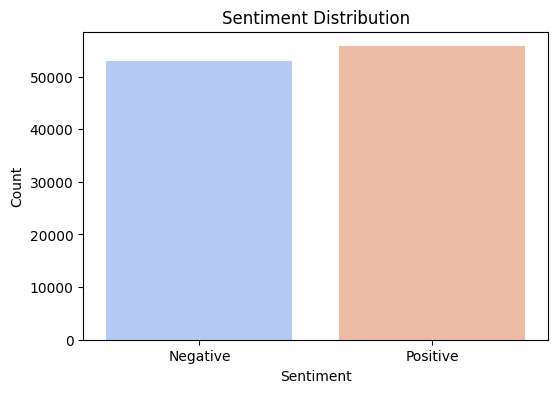

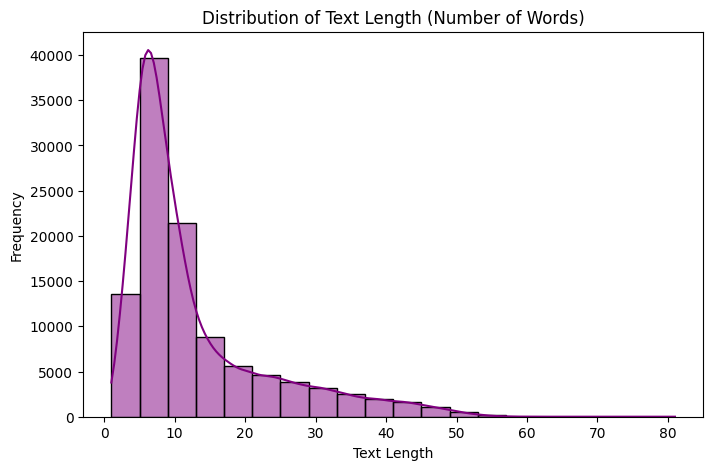

In [7]:
#This grpah will give us a comparison of positive and negative sentiments in our graph 
plt.figure(figsize=(6,4))
sns.countplot(x='Sentiment', data=df, palette='coolwarm')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Text length distribution
df['text_length'] = df['Sentence'].apply(lambda x: len(x.split()))

# Display the result
df[['Sentence', 'text_length']].head()

# Visualize distribution of text length 
plt.figure(figsize=(8,5))
sns.histplot(df['text_length'], bins=20, kde=True, color='purple')
plt.title('Distribution of Text Length (Number of Words)')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

Positive and Negative Bag of Words

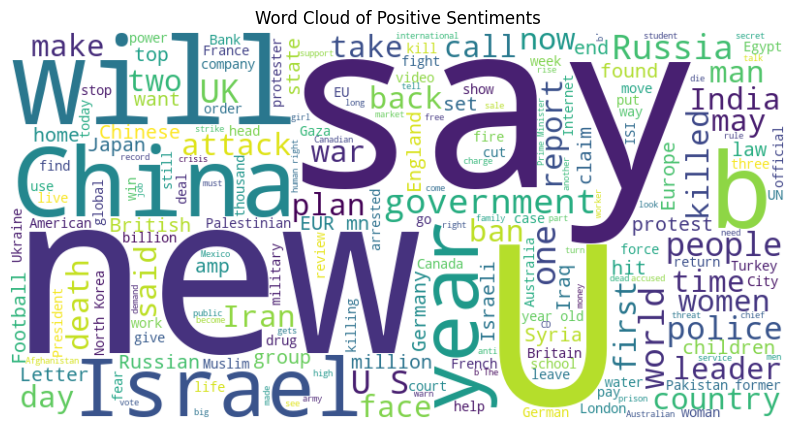

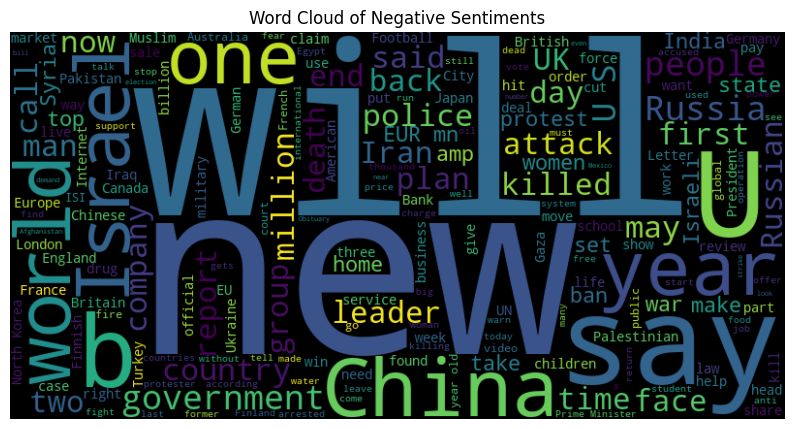

In [8]:
# Positive sentiment word cloud
positive_text = ' '.join(df[df['Sentiment'] == 'Positive']['Sentence'].values)

if positive_text.strip():  # Ensure there is at least 1 word
    plt.figure(figsize=(10,6))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Positive Sentiments')
    plt.show()
else:
    print("No positive sentiment text available for word cloud.")

# Negative sentiment word cloud
negative_text = ' '.join(df[df['Sentiment'] == 'Negative']['Sentence'].values)

if negative_text.strip():  # Ensure there is at least 1 word
    plt.figure(figsize=(10,6))
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate(negative_text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Negative Sentiments')
    plt.show()
else:
    print("No negative sentiment text available for word cloud.")

Positive Word Sentiment Distribution 

C:\Users\imans\AppData\Local\Temp\ipykernel_33844\541109029.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=top_positive_df, palette='Blues_d')


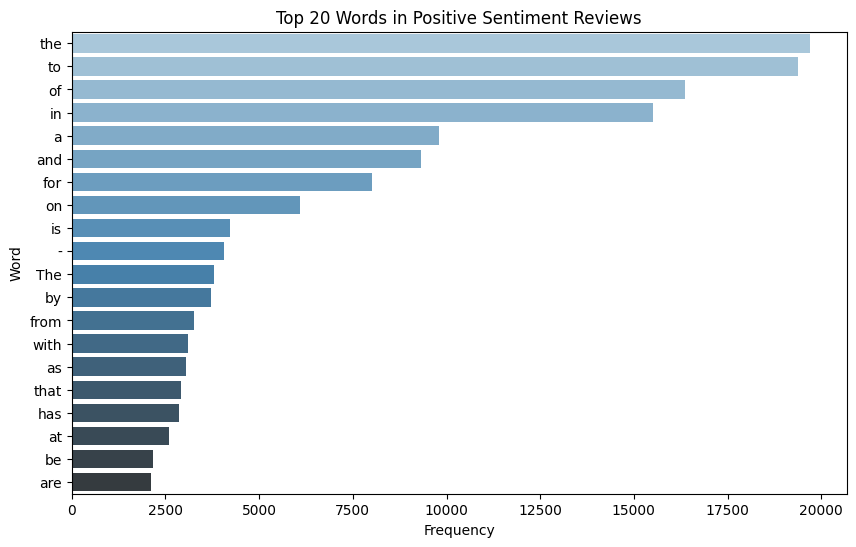

In [9]:
# Counting words in positive sentiment 
positive_reviews = df[df['Sentiment'] == 'Positive']['Sentence'].str.cat(sep=' ')
positive_words = positive_reviews.split()

# Count the frequency of words
positive_word_count = Counter(positive_words)

# Get the top 20 most common words in positive 
top_positive_words = positive_word_count.most_common(20)

top_positive_df = pd.DataFrame(top_positive_words, columns=['Word', 'Frequency'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=top_positive_df, palette='Blues_d')
plt.title('Top 20 Words in Positive Sentiment Reviews')
plt.show()

Negative Word Sentiment Distribution 

C:\Users\imans\AppData\Local\Temp\ipykernel_33844\3130517168.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=top_negative_df, palette='Reds_d')


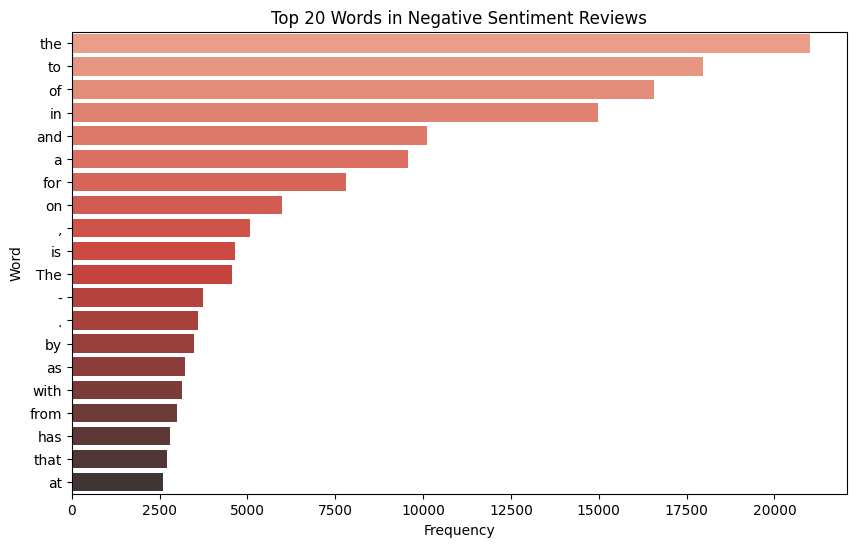

In [10]:
negative_reviews = df[df['Sentiment'] == 'Negative']['Sentence'].str.cat(sep=' ')
negative_words = negative_reviews.split()

# Count the frequency of words
negative_word_count = Counter(negative_words)

# Get the top 20 most common words in negative 
top_negative_words = negative_word_count.most_common(20)

top_negative_df = pd.DataFrame(top_negative_words, columns=['Word', 'Frequency'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=top_negative_df, palette='Reds_d')
plt.title('Top 20 Words in Negative Sentiment Reviews')
plt.show()

Looking at our dataset, we decided that the text should be at least 40 chracters or longer, else it is likely an outlier. 

In [11]:
# Remove rows where 'Sentence' has fewer than 40 characters
df = df[df['Sentence'].apply(len) >=40 ]



This code performs filtering and labeling on a dataset containing financial sentiment data. The main objective is to retain sentences relevant to the financial domain and assign sentiment labels to each sentence based on keyword presence. Specifically:

business_finance_terms: A list of financial terms used to ensure relevance to market data. Sentences without these terms are excluded.
irrelevant_terms: A list of non-financial terms or sensitive topics; sentences containing these are discarded.
locations: A list of geographic locations; sentences mentioning locations are retained only if they also contain financial terms.
Labeling: Sentences are labeled as "Positive," "Negative," or "Neutral" based on the presence of specific keywords associated with each sentiment.
The code filters, labels, and displays the resulting dataset's size and sentiment distribution.

In [12]:
# Define lists of terms to filter and classify sentences

# 1. List of business and finance-related terms
business_finance_terms = [
    "stock", "market", "exchange", "bond", "shares", "earnings", "revenue", "profit", "loss",
    "equity", "dividend", "index", "capital", "assets", "liabilities", "valuation", "growth",
    "debt", "investment", "investor", "portfolio", "rate", "interest", "inflation", "credit",
    "risk", "return", "yield", "trading", "hedge", "fiscal", "quarterly", "annual", "sales",
    "merger", "acquisition", "buyback", "IPO", "liquidity", "bankruptcy", "cash flow",
    "net income", "volatility", "analyst", "forecast", "price", "valuation", "ratio", "P/E",
    "EPS", "ETF", "real estate", "commodities", "currency", "bull market", "bear market",
    "recession", "economic", "shareholder", "debt", "yield", "leverage", "ROE", "ROI",
    "inflation", "deflation", "cost", "operating income", "EBITDA", "corporation", "business",
    "company", "fund", "strategy", "stakeholder", "shareholders", "CEO", "CFO", "corporate",
    "expense", "revenue growth", "profitability", "balance sheet", "income statement",
    "cash flow statement", "management", "subsidiary", "conglomerate", "business unit",
    "organization", "strategy", "financials", "finance", "budgeting", "resources", "fiscal year",
    "budget", "consultancy", "workforce", "SWOT", "R&D", "audit", "cost-benefit",
    "fund management", "lending", "profit margin", "expenses", "partnership", "debt-to-equity",
    "principal", "interest rate", "cash reserve", "dividend yield", "equity stake",
    "board of directors", "venture capital", "private equity", "investment fund", "growth rate",
    "return rate", "EUR", "$"
]

# 2. List of irrelevant or sensitive terms
irrelevant_terms = [
    "kill", "killing", "killed", "rape", "raping", "raped", "bomb", "bombing", "bombed",
    "murder", "murdering", "murdered", "suicide", "suicides", "assault", "assaulted", "assaulting",
    "terrorist", "terror", "terrorists", "attack", "attacking", "attacked", "attacks", "violence",
    "violent", "abuse", "abusing", "abused", "weapon", "weapons", "destruction", "destroying",
    "destroy", "destroyed", "destroying", "abortion", "abortions", "Israel", "Iraq", "Gaza",
    "Palestine", "Muslims", "die", "death", "dying", "genocide", "sex", "sexual", "lesbian",
    "gay", "homosexual"
]

# 3. List of locations
locations = [
    "New York", "London", "Paris", "Berlin", "Tokyo", "Canada", "Australia", "Germany", "China",
    "Japan", "Russia", "France", "India", "Brazil"
]

# Compile regular expression patterns for matching terms efficiently
finance_pattern = re.compile(r'\b(?:' + '|'.join(business_finance_terms) + r')\b', re.IGNORECASE)
irrelevant_pattern = re.compile(r'\b(?:' + '|'.join(irrelevant_terms) + r')\b', re.IGNORECASE)
location_pattern = re.compile(r'\b(?:' + '|'.join(locations) + r')\b', re.IGNORECASE)

# Define a function to filter sentences based on financial relevance and irrelevance criteria
def filter_sentences(text):
    # Check if the sentence contains at least one finance term, no irrelevant terms, and handle location logic
    has_finance_term = bool(finance_pattern.search(text))
    has_irrelevant_term = bool(irrelevant_pattern.search(text))
    has_location = bool(location_pattern.search(text))
    
    # Sentence is kept if it has finance terms and no irrelevant terms, or has a location and finance term
    return (has_finance_term and not has_irrelevant_term) or (has_location and has_finance_term)

# Apply filtering criteria to sentences longer than 40 characters
df_filtered = df[df['Sentence'].apply(len) >= 40]
df_filtered = df_filtered[df_filtered['Sentence'].apply(filter_sentences)]
print(f"Original dataset size: {len(df)}, Filtered dataset size: {len(df_filtered)}")

# Define sentiment-related terms and patterns
positive_terms = ["profit", "growth", "gain", "increase", "rise", "improvement", "successful"]
negative_terms = ["loss", "decline", "decrease", "drop", "risk", "failure", "bankruptcy"]
positive_pattern = re.compile(r'\b(?:' + '|'.join(positive_terms) + r')\b', re.IGNORECASE)
negative_pattern = re.compile(r'\b(?:' + '|'.join(negative_terms) + r')\b', re.IGNORECASE)

# Function to label sentiment based on presence of positive or negative terms
def label_sentiment(text):
    if positive_pattern.search(text):
        return "Positive"
    elif negative_pattern.search(text):
        return "Negative"
    return "Neutral"

# Apply labeling function to filtered data and show distribution of labels
df_filtered['Sentiment'] = df_filtered['Sentence'].apply(label_sentiment)
print(df_filtered['Sentiment'].value_counts())

Original dataset size: 75051, Filtered dataset size: 42561
Sentiment
Neutral     40430
Positive     1529
Negative      602
Name: count, dtype: int64


In this step, we address the class imbalance in our dataset caused by the high number of neutral sentiments compared to positive and negative sentiments. To balance the dataset, we use oversampling to increase the number of positive and negative samples, matching approximately half the size of the neutral class.

In [13]:
# Step 1: Separate each sentiment class into individual DataFrames
neutral = df_filtered[df_filtered['Sentiment'] == "Neutral"]
positive = df_filtered[df_filtered['Sentiment'] == "Positive"]
negative = df_filtered[df_filtered['Sentiment'] == "Negative"]

# Step 2: Oversample the positive and negative classes
# Here, we create more samples for the positive and negative classes to reduce class imbalance.
# 'replace=True' allows resampling with replacement.
positive_oversampled = resample(positive, replace=True, n_samples=len(neutral) // 2, random_state=42)
negative_oversampled = resample(negative, replace=True, n_samples=len(neutral) // 2, random_state=42)

# Step 3: Combine the oversampled positive and negative samples with the original neutral class
df_balanced = pd.concat([neutral, positive_oversampled, negative_oversampled])

# Step 4: Display the new distribution of sentiment classes to confirm balancing
print(df_balanced['Sentiment'].value_counts())


Sentiment
Neutral     40430
Positive    20215
Negative    20215
Name: count, dtype: int64


In this step, we clean the text in our dataset by removing punctuation, numbers, and common words (stopwords) that do not contribute significantly to sentiment. We also lemmatize the words, which reduces them to their base forms, helping the model focus on the essential meaning of each word.

In [14]:
# Step 1: Initialize Lemmatizer
# The lemmatizer reduces words to their base forms (e.g., "running" to "run"), helping simplify word variations.
lemmatizer = WordNetLemmatizer()

# Step 2: Define Stopwords
# This set includes common English stopwords as well as specific business-related terms like "market" and "company" 
# that appear frequently but may not add significant value for sentiment classification.
stop_words = set(stopwords.words('english')).union({'market', 'company', 'stock', 'share', 'revenue', 'profit'})

# Step 3: Define Text Cleaning Function
def clean_text(text):
    # Convert to lowercase and remove punctuation
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text.lower())
    
    # Remove numbers
    text = re.sub(r"\d+", "", text)
    
    # Tokenize (split into words), remove stopwords, and lemmatize
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    
    # Join the processed words back into a single string
    return " ".join(words)

# Step 4: Apply Cleaning Function to DataFrame
# Applying 'clean_text' to each row in the 'Sentence' column to create a new column, 'cleaned_text'.
df_balanced['cleaned_text'] = df_balanced['Sentence'].apply(clean_text)

In this step, we are loading pre-trained GloVe embeddings, a word embedding model, which represents words as vectors. These embeddings will be used to represent the words in our dataset in a numerical form that captures semantic meaning, allowing our model to better understand the context and sentiment of each sentence.

In [15]:
# Step 1: Define Function to Load GloVe Embeddings
def load_glove_embeddings(filepath): 
    # Create an empty dictionary to store the embeddings
    embeddings_dict = {}
    
    # Step 2: Open GloVe File
    # Open the file containing the pre-trained embeddings
    with open(filepath, 'r', encoding='utf-8') as f:
        # Step 3: Parse Each Line in the File
        for line in f:
            # Split each line into word and vector components
            values = line.split()
            
            # The first value is the word
            word = values[0]
            
            # The remaining values are the word's embedding vector
            vector = np.asarray(values[1:], "float32")
            
            # Step 4: Store Word and Vector in Dictionary
            embeddings_dict[word] = vector
    
    # Return the dictionary containing all word embeddings
    return embeddings_dict

# Step 5: Specify GloVe File Path and Load Embeddings
# Specify the path to the GloVe embeddings file
glove_path = 'C:\\Users\\imans\\OneDrive\\Documents\\CAPSTONE PROJECT\\glove.6B.300d.txt'

# Call the function to load embeddings and store them in the variable glove_embeddings
glove_embeddings = load_glove_embeddings(glove_path)

This code defines a function to generate an embedding vector for a given sentence using GloVe embeddings. For each word in a sentence, it retrieves the corresponding GloVe vector and calculates the average across all words in the sentence, resulting in a single fixed-length vector that represents the sentence. This vector provides a numeric representation that captures the meaning of the entire sentence based on the individual GloVe word embeddings.

In [16]:
# Step 1: Define Function to Generate GloVe Embedding for a Sentence
def get_glove_embedding(sentence, embeddings_dict, embedding_dim=300):
    # Step 2: Split Sentence into Words
    # Tokenize the sentence by splitting it into individual words
    words = sentence.split()
    
    # Step 3: Compute Sentence Embedding
    # For each word in the sentence, retrieve the GloVe embedding if available,
    # otherwise use a zero vector of specified embedding dimension
    embedding = np.mean([embeddings_dict.get(word, np.zeros(embedding_dim)) for word in words], axis=0)
    
    # Step 4: Return the Final Embedding Vector for the Sentence
    return embedding

This code prepares and splits the text data for sentiment classification using GloVe embeddings. Each sentence is converted into a GloVe-embedded vector, with the data split into training and test sets to facilitate model training and evaluation. We confirm the shape of the resulting embeddings to ensure they are ready for input into a machine learning model.

In [17]:
# Step 1: Define the Features and Labels
# `Sentence` is the feature (text data), and `Sentiment` is the label (classification target).
X = df_balanced['cleaned_text']  # Features (cleaned text data)
y = df_balanced['Sentiment']      # Labels (sentiment categories: Positive, Neutral, Negative)

# Step 2: Perform Train-Test Split
# Split the data into training and testing sets with a test size of 20% and a random state for reproducibility.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirm the sizes of the splits
print(f"Training size: {len(X_train)}, Test size: {len(X_test)}")

Training size: 64688, Test size: 16172


This code applies the get_glove_embedding function to transform each sentence in the training and testing datasets into their respective GloVe embeddings. Each sentence in X_train and X_test is converted to a fixed-length numerical vector, allowing it to be used as input for machine learning models.

In [18]:
# Step 1: Transform Training Data Sentences into GloVe Embeddings
# Using the `get_glove_embedding` function, transform each sentence in the X_train set
# into a fixed-length vector based on the average of GloVe embeddings for each word in the sentence.
X_train_embeddings = np.array([get_glove_embedding(text, glove_embeddings) for text in X_train])

# Step 2: Transform Testing Data Sentences into GloVe Embeddings
# Similarly, apply the `get_glove_embedding` function to each sentence in X_test
# to convert them into numerical vectors.
X_test_embeddings = np.array([get_glove_embedding(text, glove_embeddings) for text in X_test])

This code builds, trains, and evaluates a logistic regression model for sentiment classification. The model is trained on GloVe-embedded vectors of text data, predicting the sentiment class for each sample in the test dataset. We print the model’s accuracy and a classification report for a detailed view of its performance.

Logistic Regression Accuracy: 0.8653
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

    Negative       0.81      0.90      0.85      4022
     Neutral       0.92      0.84      0.88      8068
    Positive       0.83      0.89      0.86      4082

    accuracy                           0.87     16172
   macro avg       0.85      0.87      0.86     16172
weighted avg       0.87      0.87      0.87     16172



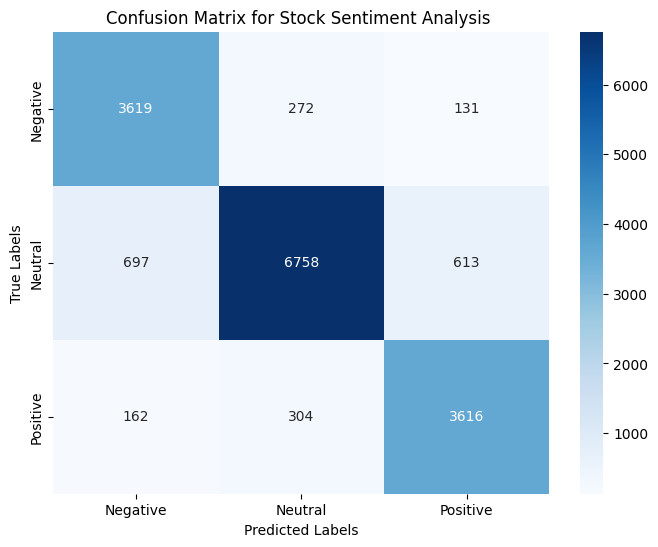

In [19]:
# Step 1: Initialize Logistic Regression Model
# Create an instance of the LogisticRegression model with a balanced class weight to handle any class imbalance,
# and set the maximum number of iterations to 1000 for model convergence.



model = LogisticRegression(max_iter=1000, class_weight='balanced')

# Step 2: Train the Model
# Train the logistic regression model on the training data embeddings and the sentiment labels.
model.fit(X_train_embeddings, y_train)

# Step 3: Make Predictions on the Test Set
# Use the trained model to predict sentiment labels for the test data embeddings.
y_pred = model.predict(X_test_embeddings)

# Step 4: Evaluate Model Accuracy
# Calculate and print the accuracy of the logistic regression model on the test data.
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Step 5: Display Classification Report
# Generate and display a classification report showing precision, recall, and F1-score for each sentiment class.
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred))

# Step 6: Display Confusion Matrix
# Generate a confusion matrix for the test data predictions to evaluate misclassifications.
conf_matrix = confusion_matrix(y_test, y_pred)

# Step 7: Visualize the Confusion Matrix
# Use seaborn heatmap for a clear visualization of the confusion matrix.
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Stock Sentiment Analysis ')
plt.show()